In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Distribución de Fisher-Tippet

Diseñe, implemente y verifique una función en \textsc{python} que retorne un número aleatorio con una distribución de \textit{Fisher-Tippett} con parámetro $\lambda$, calculado mediante el método de inversión. 

Ayuda: Para testear la función se puede calcular la media de los números generados y comparala con el valor de expectación de la distribución de Fisher-Tippett, que es $E(F) = 0.57721/\lambda$.

\begin{equation*}
	f(x) = \frac{1}{\sigma}\, t(x)^{\xi + 1}\, e^{-t(x)}  
\end{equation*}
donde $t(x)$ para $\xi = 0$ viene dada por:
\begin{equation*}
	t(x) = e^{-\frac{x-\mu}{\sigma}}
\end{equation*}
y para $\xi \neq 0$
\begin{equation*}
	t(x) = \left( 1 + \xi\ \frac{x - \mu}{\sigma} \right)^{-\frac{1}{\xi}}
\end{equation*}
con $\sigma$,$\mu$ y $\xi$ son los parámetros de la distribución.

Soporte 
\begin{cases}
\begin{align}
& x \in [ \mu - \sigma/\xi, +\infty) & \  & {\text{cuando}}\ \xi > 0 \\
& x \in ( -\infty, +\infty )         & \  & {\text{cuando}}\ \xi = 0 \\
& x \in ( -\infty, \mu - \sigma/\xi ] & \  & {\text{cuando}}\ \xi < 0
\end{align}
\end{cases}

La media de la distribución es:
\begin{cases}
\begin{align}
& \mu +\sigma (g_{1}-1)/\xi & \,\, & {\text{si}}\ \xi \neq 0,\xi < 1,\\
& \mu +\sigma \,\gamma      & \,\, & {\text{si}}\ \xi =0,\\
& \infty                    & \,\, & {\text{si}}\ \xi \geq 1,
\end{align}
\end{cases}
donde $g_k$ es $\Gamma(1-k\xi)$, y $\gamma$ es la constante de Euler ($\gamma = 2.718$)

Para encontrar la Función de Distribución Acumulada, notemos primero que:
\begin{equation*}
	\frac{d\, t(x)}{dx} = -\frac{1}{\sigma}\, t(x)^{1+\xi}
\end{equation*}
Entonces, $f(x)$ se puede escribir como:
\begin{align}
f(x) = & -\frac{d\, t(x)}{dx} e^{-t(x)} \\
     = & \frac{d\, e^{-t(x)}}{dx}
\end{align}
Por lo tanto,
\begin{align}
F(x) = & \int f(x)\, dx \\
     = & \int \frac{d\, e^{-t(x)}}{dx}\, dx\\
     = &\, e^{-t(x)}
\end{align}
Una vez encontrada la función acumulada, debemos calcular la función inversa de la misma $F^{-1}(y)$. Para ello recordamos que la inversa de una función compuesta es la composición de las inversas de las funciones invertida. Es decir
\begin{equation}
(g\ \text{o}\ f)^{-1} = f^{-1}\ \text{o}\ g^{-1}
\end{equation} 
Si reescribimos $F(x)$ como
\begin{equation}
F(x) = g(x)\ \text{o}\ f(x)
\end{equation}
donde
\begin{align}
f(x) & = t(x) \\
g(x) & = e^{-x}
\end{align}
La función inversa la podemos calcular entonces como:
\begin{equation}
F^{-1}(y) = t^{-1}(-\text{ln}(y))
\end{equation}
donde $t^{-1}(y)$ para $\xi = 0$ viene dada por:
\begin{equation*}
	t^{-1}(y) = \text{ln}(y)\cdot\sigma + \mu
\end{equation*}
y para $\xi \neq 0$
\begin{equation*}
	t^{-1}(y) = \left( y^{-\xi} - 1 \right)\cdot\frac{\sigma}{\xi} + \mu
\end{equation*}
con $\sigma$,$\mu$ y $\xi$ son los parámetros de la distribución.

In [85]:
def t(x,xi=0.0,sigma=1.0,mu=0.0):
    if (xi == 0.0):
        y = np.exp(-(x-mu)/sigma)
    else:
        y = (1 + xi*(x-mu)/sigma)**(-1.0/xi)
    return y
    
def f(x,xi=0.0,sigma=1.0,mu=0.0):
    z = t(x,xi=xi,sigma=sigma,mu=mu)
    y = 1./sigma*z**(1.+xi)*np.exp(-z)
    return y

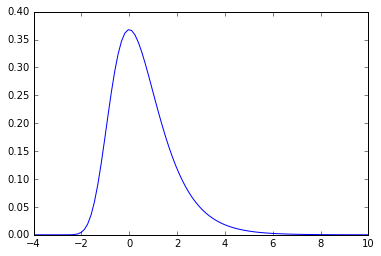

In [61]:
x = np.linspace(-4.0,10.0,100)
plt.plot(x,f(x))

In [86]:
f(-100.0)

0.0

In [41]:
def t_inv(y,xi=0.0,sigma=1.0,mu=0.0):
    if (xi == 0.0):
        x = -np.log(y)*sigma + mu
    else:
        x = (y**(-xi) - 1.0)*sigma/xi + mu
    return x

def F_inv(y,xi=0.0,sigma=1.0,mu=0.0):
    x = t_inv(z,xi=xi,sigma=sigma,mu=mu)
    return x

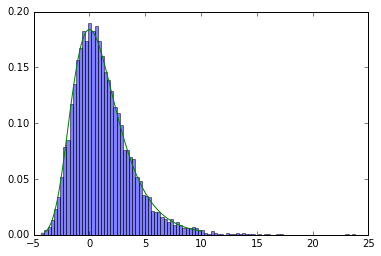

In [42]:
y = np.random.rand(10000)
x = F_inv(y,sigma=2.0)
plt.hist(x,bins=100,normed=True,alpha=0.5)

x = np.linspace(-4.0,10.0,100)
plt.plot(x,f(x,sigma=2.0))

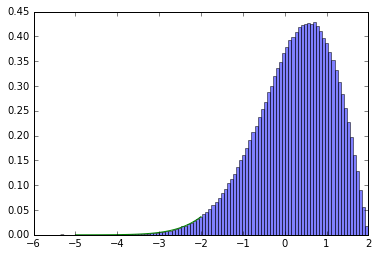

In [91]:
y = np.random.rand(1000000)
x = F_inv(y,xi=-0.5)
plt.hist(x,bins=100,normed=True,alpha=0.5)

xmax = (0.0 - 1.0/0.5)
x = np.linspace(-5.0,xmax,100)
plt.plot(x,f(x,xi=-0.5))

-0.29389307451645647 3.730759270166798


/home/marioagustin/MiniConda/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in power
  """
/home/marioagustin/MiniConda/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.


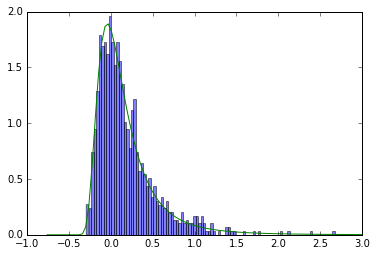

In [95]:
xi = 0.25
sigma = 0.2
mu = 0.0

y = np.random.rand(1000)
x = F_inv(y,xi=xi,sigma=sigma)
plt.hist(x[x < 3.0],bins=100,normed=True,alpha=0.5)
print x.min(),x.max()

xmin = (mu - sigma/xi)
x = np.linspace(xmin,3.0,100)
plt.plot(x,f(x,xi=xi,sigma=sigma))

# Aguja de Buffon

$\theta \in [0,\pi]$

$x \in [0,t/2] $

$p(x) = \frac{2}{t}$

$p(\theta) = \frac{1}{\pi}$

dado que $x$ y $\theta$ son variables independientes entonces:

$p(x,\theta) = p(x)p(\theta)$

La condición para que una aguja toque una raya es $x \leq \frac{l}{2}\text{sin}(\theta)$

\begin{align}
\int_{0}^{\pi} \int_{0}^{\frac{l}{2}\text{sin}(\theta)} p(x,\theta) \text{d}\theta \text{d}x & = \int_{0}^{\pi} \frac{l}{t\pi}\text{sin}(\theta) \text{d}\theta \\
& = \frac{2l}{t\pi}
\end{align}

Entonces, podemos utilizar esto para calcular el valor de $\pi$
\begin{align}
\frac{N_{tocan}}{N_{tot}} = \frac{2l}{t\pi}
\end{align}


In [1]:
params = {"t" : 1.0,
          "l" : 0.5}

plt.figure(figsize=(10,10))
plt.plot([-3.0,6.0],[0.0,0.0],lw=3,c='k')
plt.plot([-3.0,6.0],[params["t"],params["t"]],lw=3,c='k')

plt.xlim(-params["t"],2.0*params["t"])
plt.ylim(-params["t"],2.0*params["t"])

for i in range(100):
    theta = np.random.rand()*np.pi
    y = np.random.rand()*params["t"]*0.5
    
    x = np.random.rand()*0.5
        
    xs = [-np.cos(theta),np.cos(theta)]
    ys = [-np.sin(theta),np.sin(theta)]
    
    xs = np.array(xs)*params["l"]*0.5
    ys = np.array(ys)*params["l"]*0.5
    
    plt.plot(xs+x,ys+y,lw = 2)    

NameError: name 'plt' is not defined

[1, 1, 2, 6, 14, 26, 45, 85, 177, 336, 658, 1309, 2673, 5286, 10459, 20973, 41843, 83375, 166980, 333893, 667234, 1334347, 2668518]


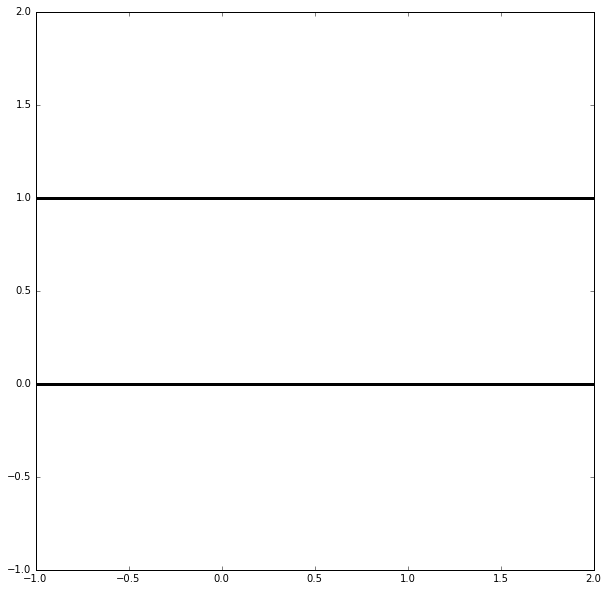

In [23]:
import matplotlib.animation
from IPython.display import display, clear_output

params = {"t" : 1.0,
          "l" : 0.5}


def lanza_aguja(params,ax=False):
    
    theta = np.random.rand()*np.pi
    y = np.random.rand()*params["t"]*0.5
    
    x = np.random.rand()*0.5
        
    xs = [-np.cos(theta),np.cos(theta)]
    ys = [-np.sin(theta),np.sin(theta)]
    
    xs = np.array(xs)*params["l"]*0.5
    ys = np.array(ys)*params["l"]*0.5
    
    if ax != False:
        ax.plot(xs+x,ys+y,lw = 2)
        
    if y < params["l"]*0.5*np.sin(theta):
        return 1
    else:
        return 0
    

fig, ax = plt.subplots(figsize=(10.0,10.0))

ax.plot([-3.0,6.0],[0.0,0.0],lw=3,c='k')
ax.plot([-3.0,6.0],[params["t"],params["t"]],lw=3,c='k')

ax.set_xlim(-params["t"],2.0*params["t"])
ax.set_ylim(-params["t"],2.0*params["t"])

ntot = 10000000
cuentas = []
cuenta = 0
n = 1
for i in range(ntot):

    #display(fig)
 
    cuenta += lanza_aguja(params,ax=False)
    
    #ax.text(-0.4,-0.4,"%d" % cuenta,
    #        bbox=dict(boxstyle="square",
    #               ec=(1.0, 1.0, 1.0),
    #              fc=(1.0, 1.0, 1.0),
    #               ))
    
    if ((i+1) == 2**n):
        cuentas.append(cuenta)
        n += 1

    #clear_output(wait=True)
    
print cuentas

In [24]:
n = np.arange(1,len(cuentas)+1)

In [25]:
e = np.array(cuentas)/2.**n.astype(float)

[]

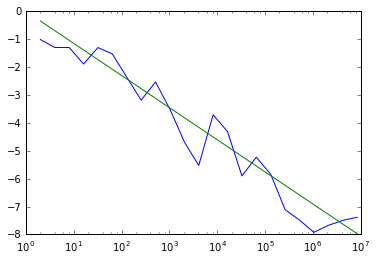

In [38]:
y = np.log(np.abs((1./e-np.pi)/np.pi))
x = 2.0**n
plt.plot(x,y)
plt.plot(x,np.log(1./np.sqrt(x)))
plt.semilogx()

In [36]:
y

array([-1.01230553, -1.29740642, -1.29740642, -1.88932619, -1.30035689,
       -1.53031268, -2.35825413, -3.18627507, -2.53528416, -3.50947121,
       -4.68069437, -5.52783985, -3.7103517 , -4.31280521, -5.90105472,
       -5.23032235, -5.84187584, -7.11120198, -7.482905  , -7.92367178,
       -7.67363232, -7.49537337, -7.3831493 ])